## Модели классификации для нескольких классов

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_df.shape

(150, 5)

In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### Описательная статистика

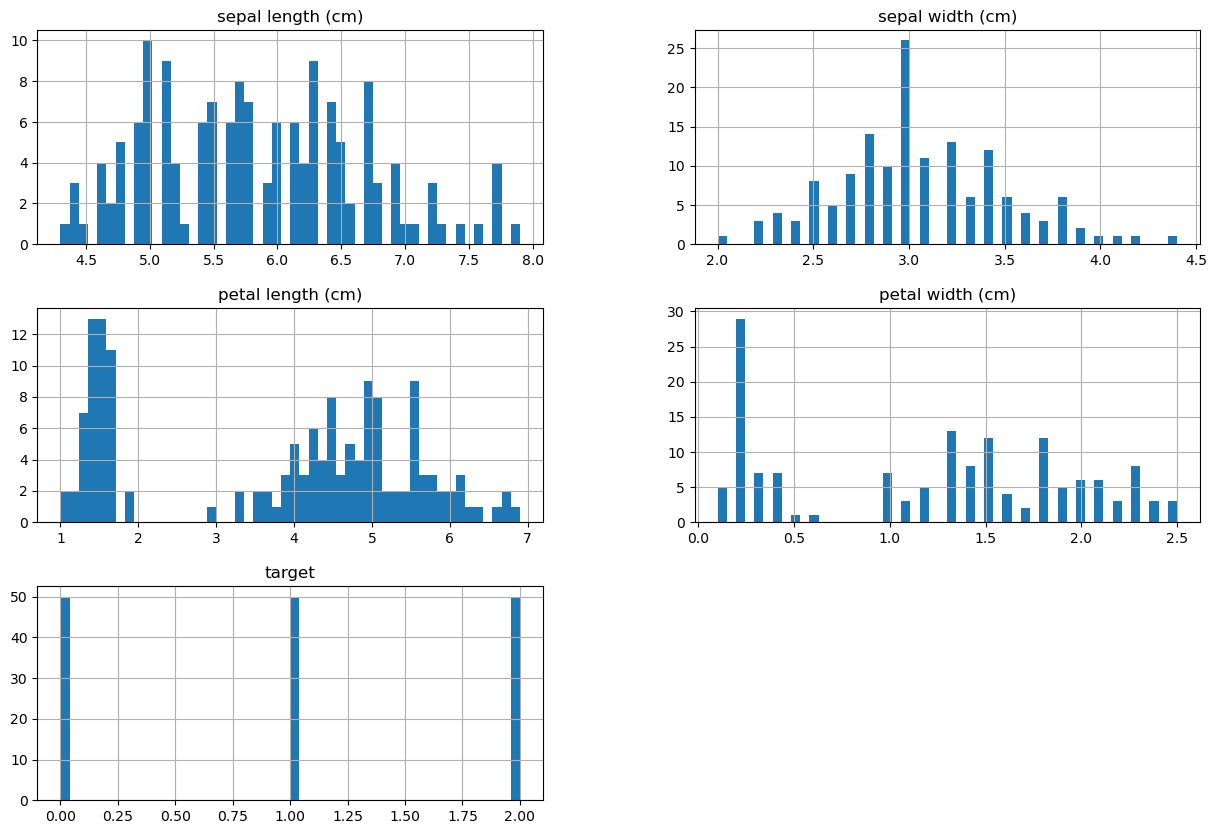

In [15]:
iris_df.hist(figsize = (15,10), bins = 50);

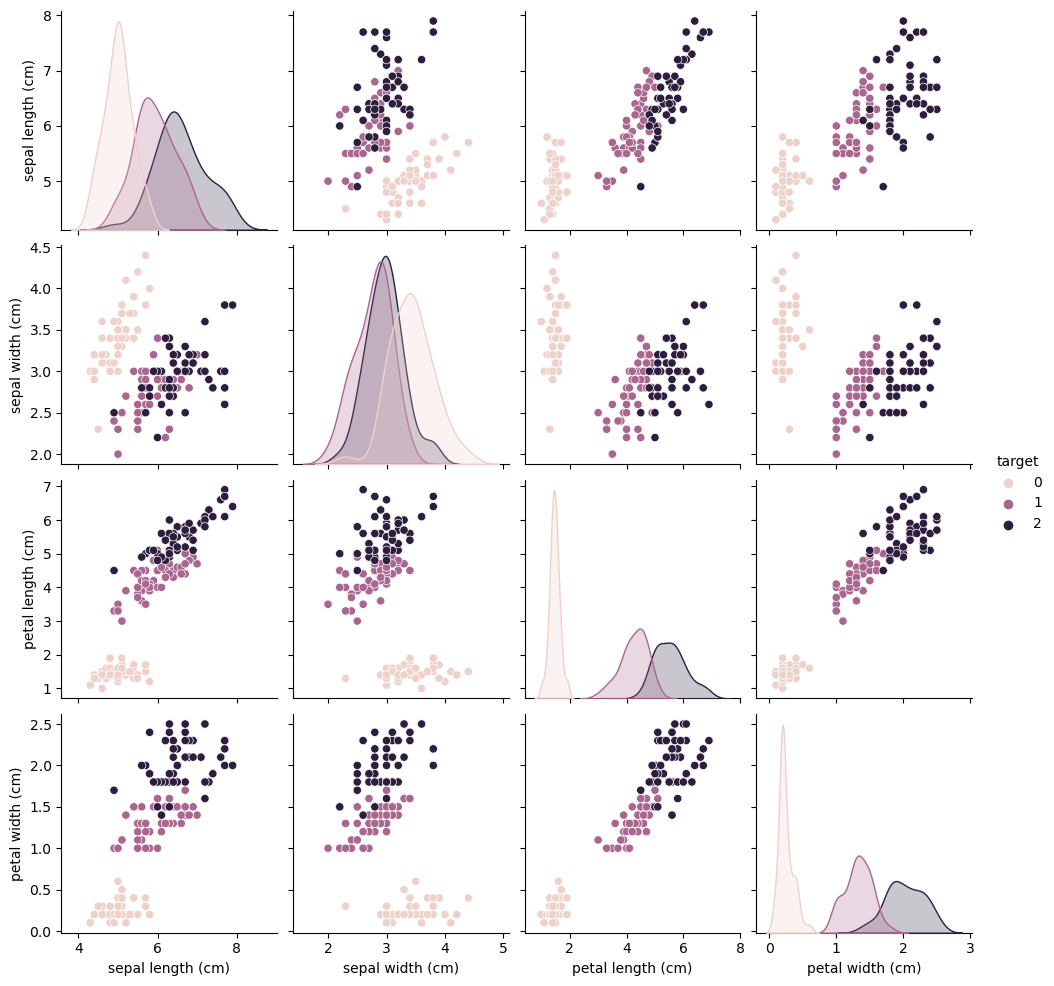

In [16]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']], hue = 'target')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

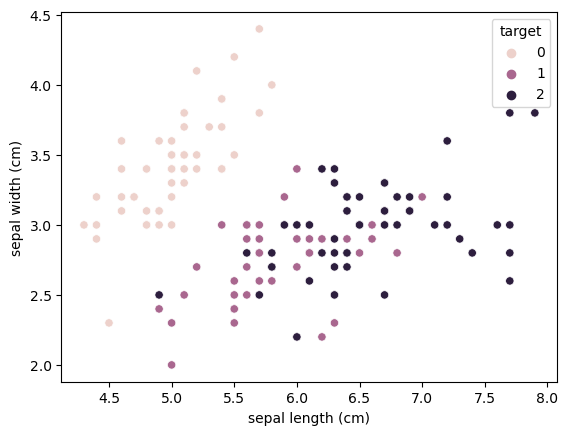

In [17]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="target")

In [18]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

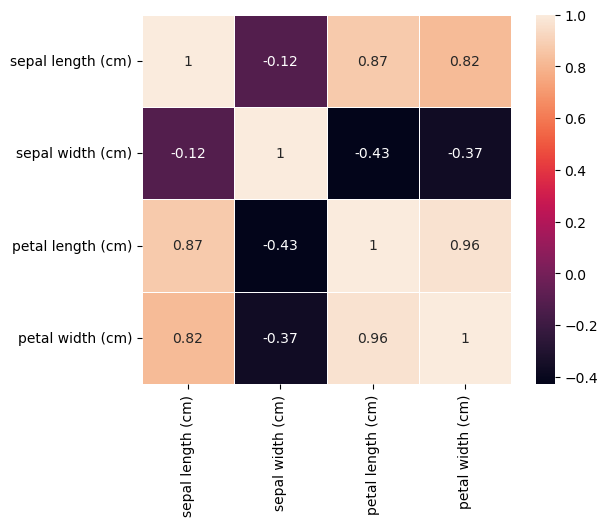

In [19]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

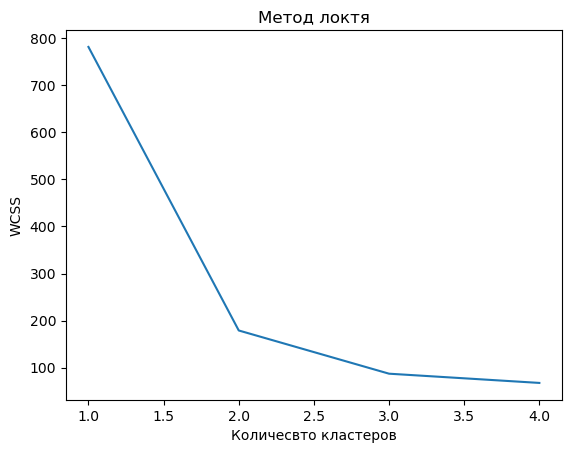

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('Метод локтя')
plt.xlabel('Количесвто кластеров')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)

In [22]:
kmeans.fit(iris_df)

KMeans(n_clusters=3, n_init=10)

In [23]:
pred=kmeans.fit_predict(iris_df)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
iris_df['cluster'] = pd.Series(kmeans.labels_)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

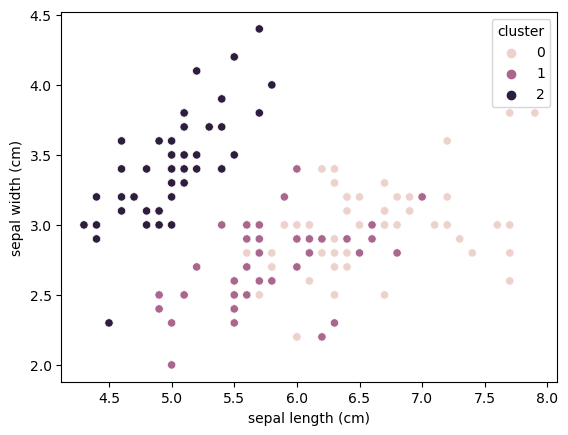

In [25]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="cluster")

Silhouette Score для KMeans: 0.6252082445530308


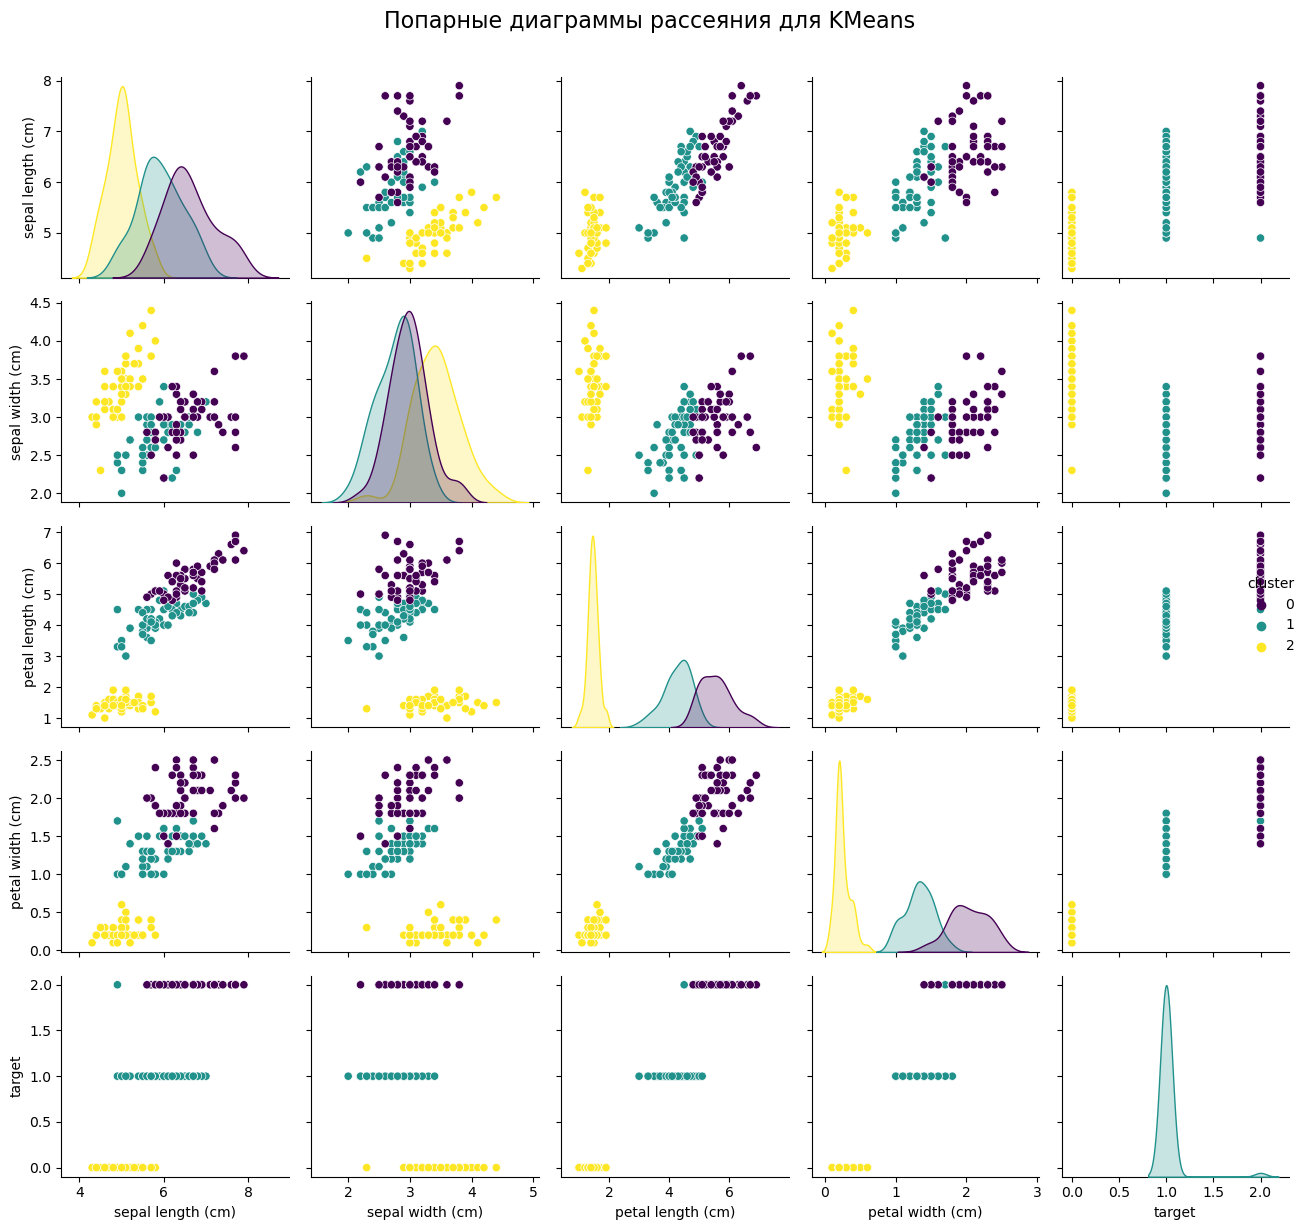

In [26]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(iris_df, pred)
print(f"Silhouette Score для KMeans: {score_kmeans}")

iris_df_kmeans = iris_df.copy()
iris_df_kmeans['cluster'] = pred
sns.pairplot(iris_df_kmeans, hue='cluster', palette='viridis')
plt.suptitle("Попарные диаграммы рассеяния для KMeans", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

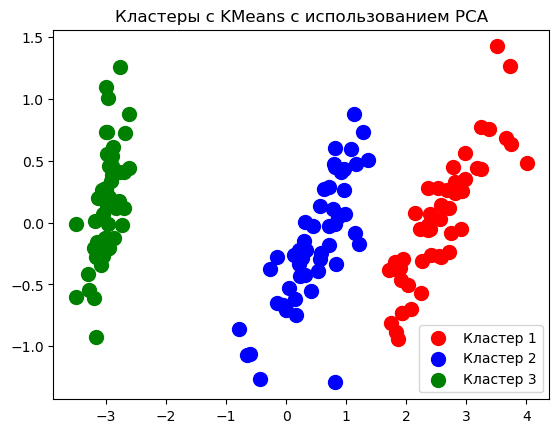

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_kmeans = pca.fit_transform(iris_df)

plt.scatter(X_pca_kmeans[pred == 0, 0], X_pca_kmeans[pred == 0, 1], s=100, c='red', label='Кластер 1')
plt.scatter(X_pca_kmeans[pred == 1, 0], X_pca_kmeans[pred == 1, 1], s=100, c='blue', label='Кластер 2')
plt.scatter(X_pca_kmeans[pred == 2, 0], X_pca_kmeans[pred == 2, 1], s=100, c='green', label='Кластер 3')
plt.title('Кластеры с KMeans с использованием PCA')
plt.legend()
plt.show()

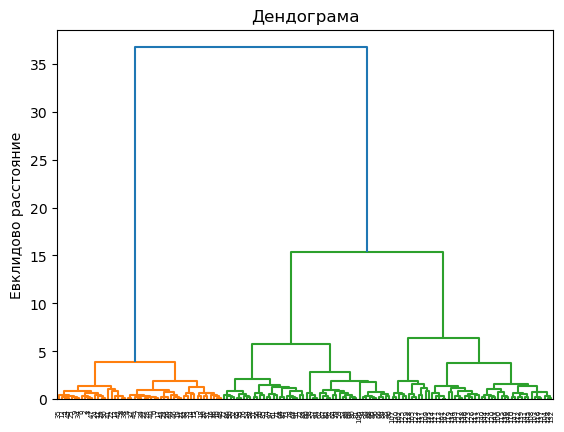

In [28]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(iris_df, method = 'ward'))
plt.title('Дендограма')
plt.ylabel('Евклидово расстояние')
plt.show()

In [29]:
metrics.calinski_harabasz_score(iris_df, kmeans.labels_)

668.3743787356708

In [30]:
metrics.davies_bouldin_score(iris_df, kmeans.labels_)

0.5808120052195264

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=3)
pred_dbscan = dbscan.fit_predict(iris_df)

score = silhouette_score(iris_df, pred_dbscan)
print(f"Silhouette Score для DBSCAN: {score}")

Silhouette Score для DBSCAN: 0.4579684404218479


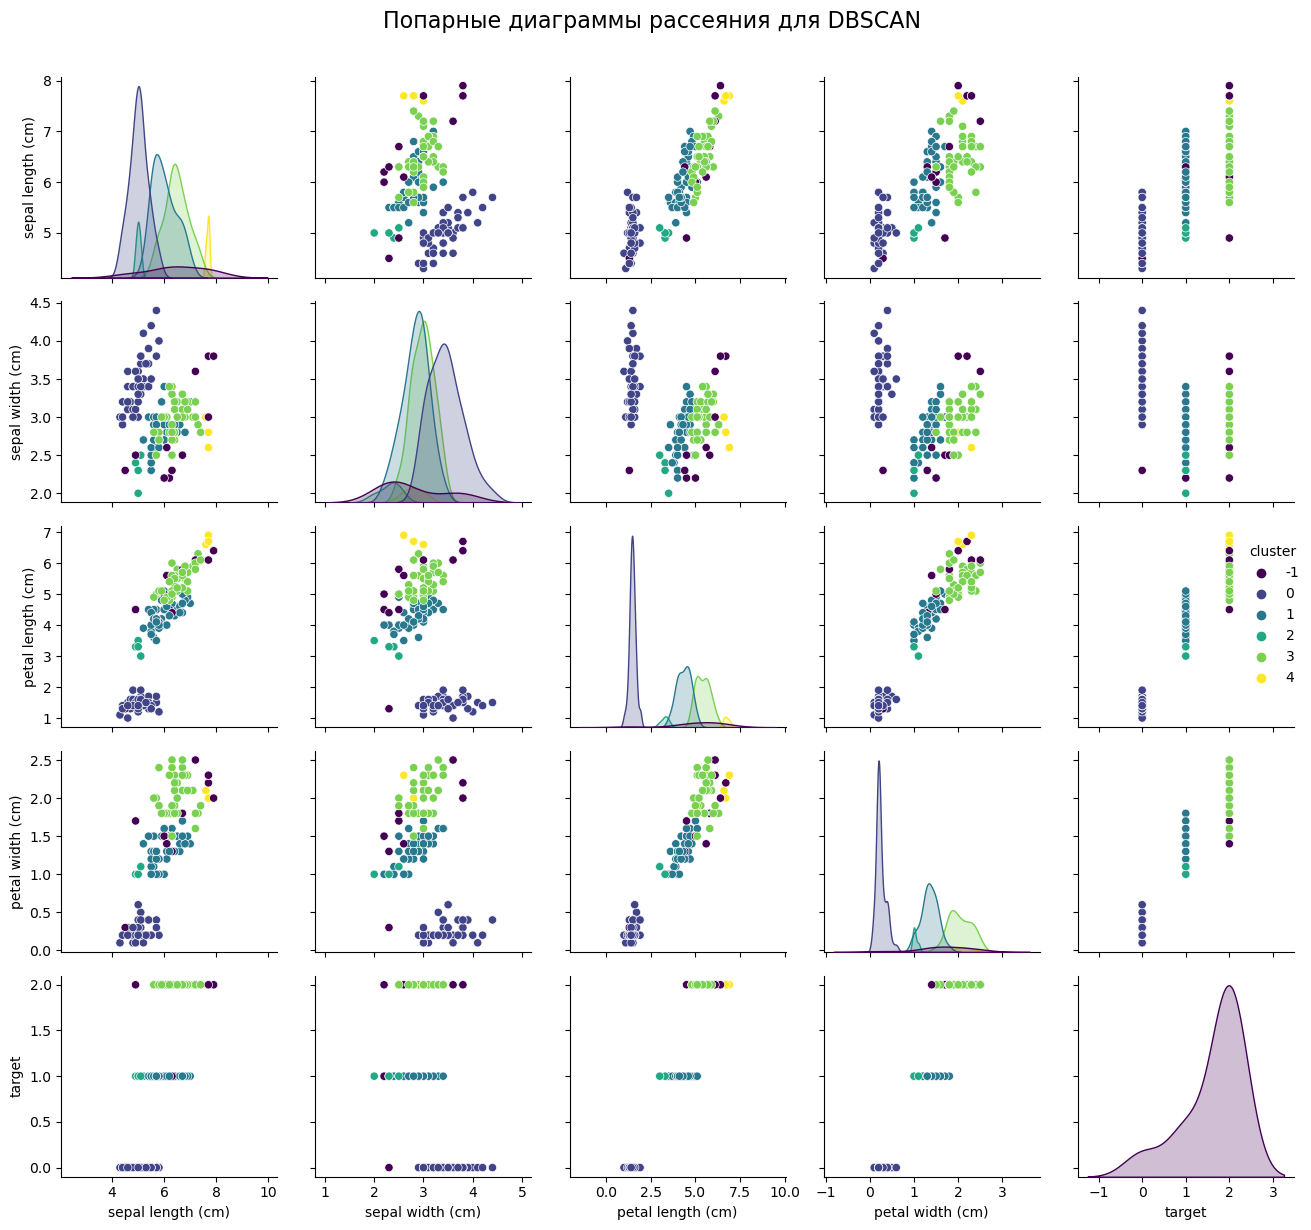

In [32]:
iris_df_dbscan = iris_df.copy()
iris_df_dbscan['cluster'] = pred_dbscan
sns.pairplot(iris_df_dbscan, hue='cluster', palette='viridis')
plt.suptitle("Попарные диаграммы рассеяния для DBSCAN", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

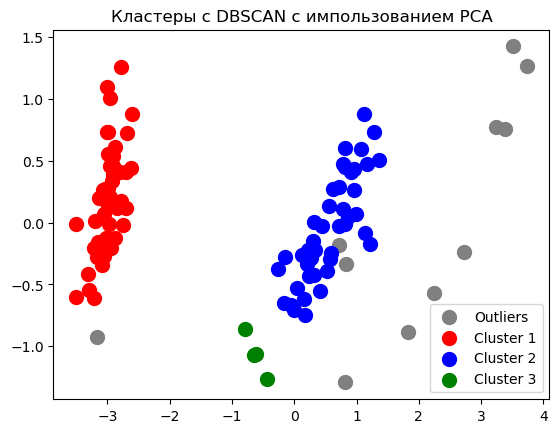

In [33]:
pca = PCA(n_components=2)
X_pca_dbscan = pca.fit_transform(iris_df)

plt.scatter(X_pca_dbscan[pred_dbscan == -1, 0], X_pca_dbscan[pred_dbscan == -1, 1], s=100, c='gray', label='Outliers')
plt.scatter(X_pca_dbscan[pred_dbscan == 0, 0], X_pca_dbscan[pred_dbscan == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca_dbscan[pred_dbscan == 1, 0], X_pca_dbscan[pred_dbscan == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca_dbscan[pred_dbscan == 2, 0], X_pca_dbscan[pred_dbscan == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Кластеры с DBSCAN с импользованием PCA')
plt.legend()
plt.show()

In [34]:
metrics.calinski_harabasz_score(iris_df, dbscan.labels_)

214.33224695456303

In [35]:
metrics.davies_bouldin_score(iris_df, dbscan.labels_)

1.7893088686040253

In [36]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
pred_agg = agg_clustering.fit_predict(iris_df)
score_agg = silhouette_score(iris_df, pred_agg)
print(f"Silhouette Score для Agglomerative Clustering: {score_agg}")

Silhouette Score для Agglomerative Clustering: 0.6252082445530308


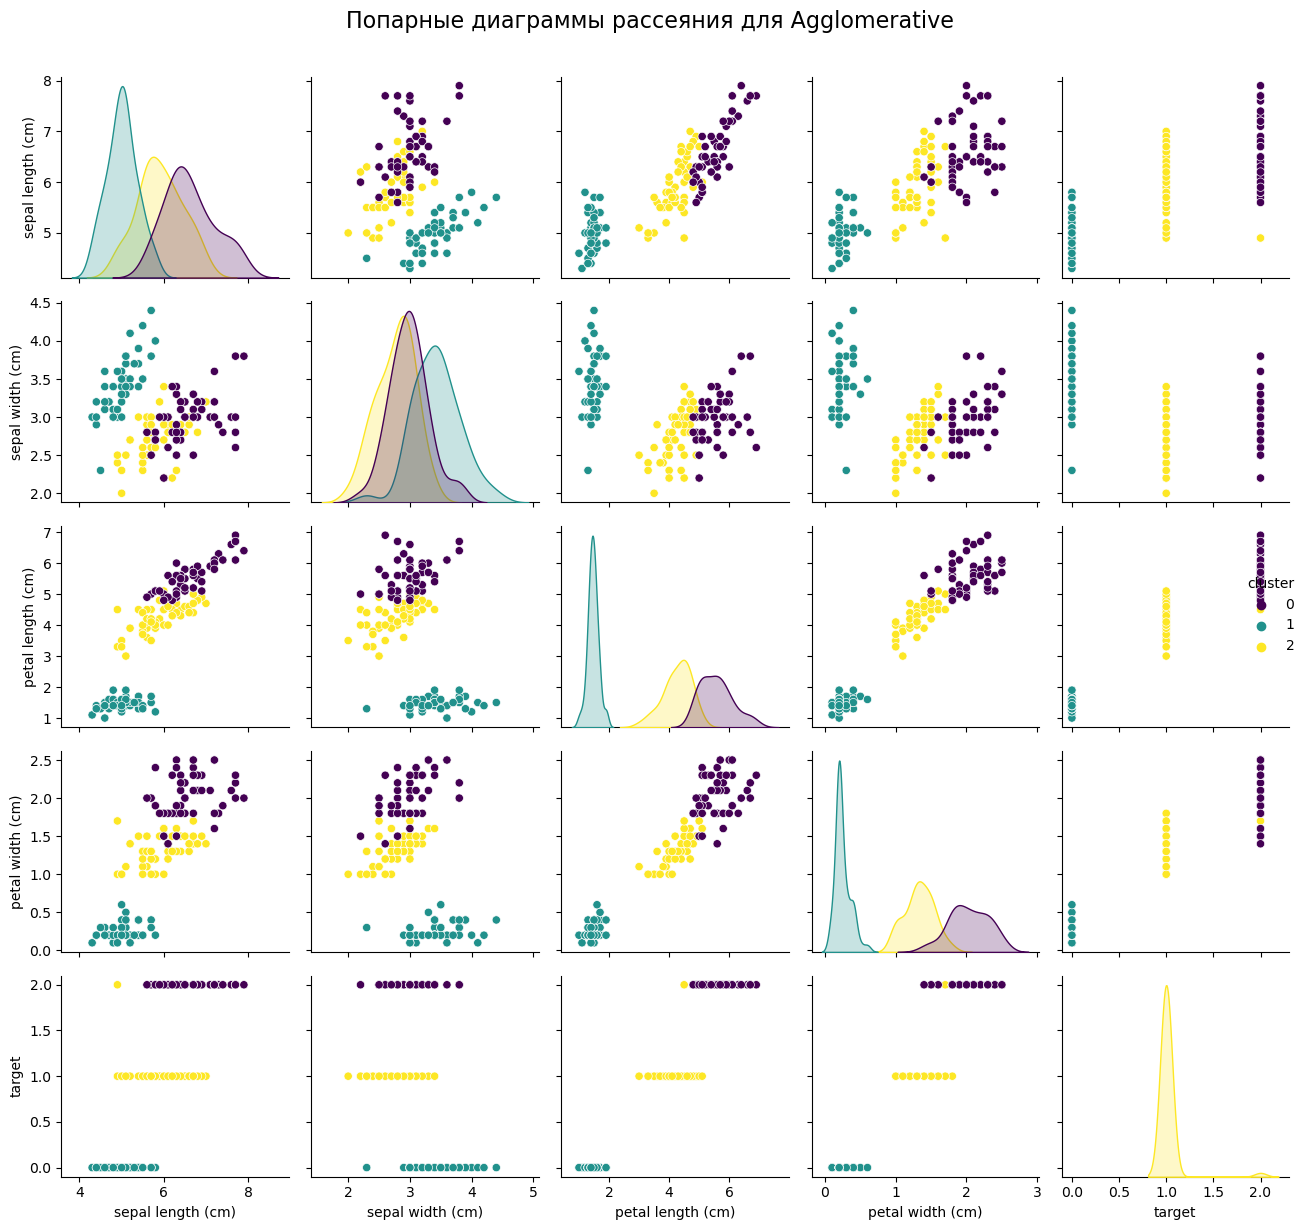

In [37]:
iris_df_agg = iris_df.copy()
iris_df_agg['cluster'] = pred_agg
sns.pairplot(iris_df_agg, hue='cluster', palette='viridis')
plt.suptitle("Попарные диаграммы рассеяния для Agglomerative", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

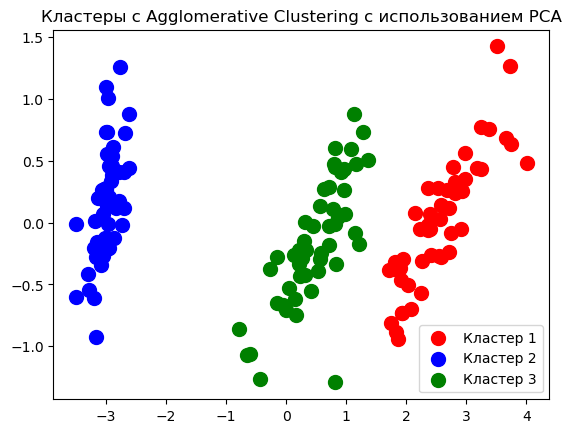

In [38]:
pca = PCA(n_components=2)
X_pca_agg = pca.fit_transform(iris_df)

plt.scatter(X_pca_agg[pred_agg == 0, 0], X_pca_agg[pred_agg == 0, 1], s=100, c='red', label='Кластер 1')
plt.scatter(X_pca_agg[pred_agg == 1, 0], X_pca_agg[pred_agg == 1, 1], s=100, c='blue', label='Кластер 2')
plt.scatter(X_pca_agg[pred_agg == 2, 0], X_pca_agg[pred_agg == 2, 1], s=100, c='green', label='Кластер 3')
plt.title('Кластеры с Agglomerative Clustering с использованием PCA')
plt.legend()
plt.show()

In [39]:
metrics.calinski_harabasz_score(iris_df, agg_clustering.labels_)

668.374378735671

In [40]:
metrics.davies_bouldin_score(iris_df, agg_clustering.labels_)

0.5808120052195264

# Сравнение

In [45]:
table_res = pd.DataFrame(columns=["Method Clasterization", "Silhouette Score", 'Calinski Harabasz', 'Davies Bouldin'])

In [46]:
table_res["Method Clasterization"] = ["KMeans", "DBSCAN", "AgglomerativeClustering"]
table_res["Silhouette Score"] = [score_kmeans, score, score_agg]
table_res["Calinski Harabasz"] = [metrics.calinski_harabasz_score(iris_df, kmeans.labels_), metrics.calinski_harabasz_score(iris_df, dbscan.labels_), metrics.calinski_harabasz_score(iris_df, agg_clustering.labels_)]
table_res["Davies Bouldin"] = [metrics.davies_bouldin_score(iris_df, kmeans.labels_), metrics.davies_bouldin_score(iris_df, dbscan.labels_), metrics.davies_bouldin_score(iris_df, agg_clustering.labels_)]

In [47]:
table_res

,Method Clasterization,Silhouette Score,Calinski Harabasz,Davies Bouldin
0,KMeans,0.625208,668.374379,0.580812
1,DBSCAN,0.457968,214.332247,1.789309
2,AgglomerativeClustering,0.625208,668.374379,0.580812


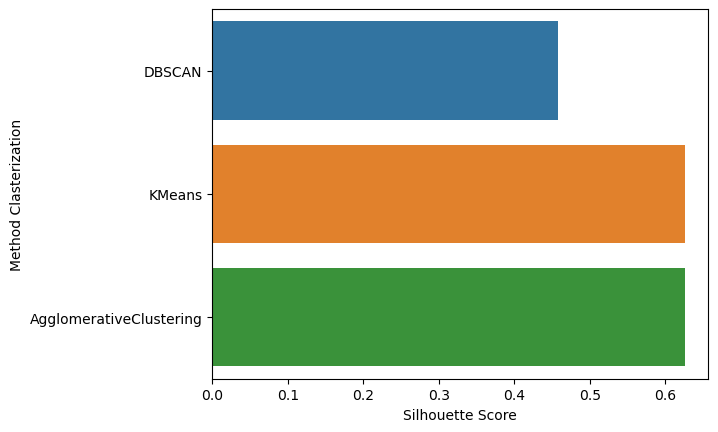

In [49]:
sns.barplot(x='Silhouette Score', y='Method Clasterization', data=table_res.sort_values(by='Silhouette Score'));

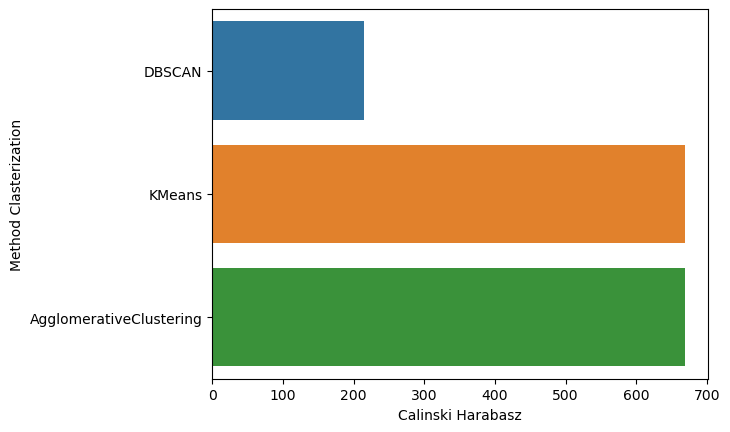

In [50]:
sns.barplot(x='Calinski Harabasz', y='Method Clasterization', data=table_res.sort_values(by='Calinski Harabasz'));

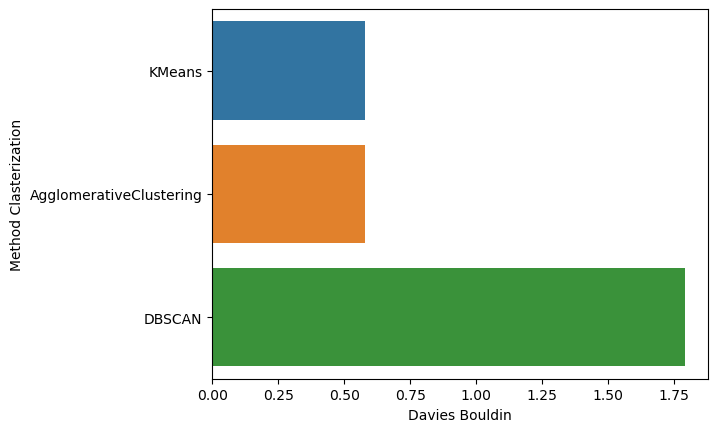

In [52]:
sns.barplot(x='Davies Bouldin', y='Method Clasterization', data=table_res.sort_values(by='Davies Bouldin'));

# Вывод

Исходя из предоставленных данных, можно сделать вывод, что KMeans и Agglomerative Clustering являются более эффективными методами кластеризации для датасета Iris, чем DBSCAN. Они показывают лучшие результаты по всем трем метрикам.